<h1> ASSIGNMENT 2 

In [108]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import time

In [138]:
data = pd.read_csv("C:/Users/tejas/OneDrive/Desktop/Assignments/COMPSCI 753/news_stream.csv", sep=',', engine='python', header=None, names=["news_id", "news_category", "date"])

In [7]:
data.head()

,news_id,news_category,date
0,0,U.S. NEWS,2022-09-23
1,1,U.S. NEWS,2022-09-23
2,2,COMEDY,2022-09-23
3,3,PARENTING,2022-09-23
4,4,U.S. NEWS,2022-09-22


1. Brute Force Approach and Performance Evaluation

(A) Compute the average frequency of the news categories in the news stream. 

In [146]:
category_counts = data['news_category'].value_counts()
total_count = len(data)
frequency = category_counts / total_count
average_frequency = category_counts.mean()
print("Average Frequency of News Categories:")
print(average_frequency)

Average Frequency of News Categories:
4988.738095238095


(B) Compute the true frequencies of all categories. Please report the observed category distribution using a
bar chart with frequencies in descending order. (Note: x-axis as categories, and y-axis as true frequency.)

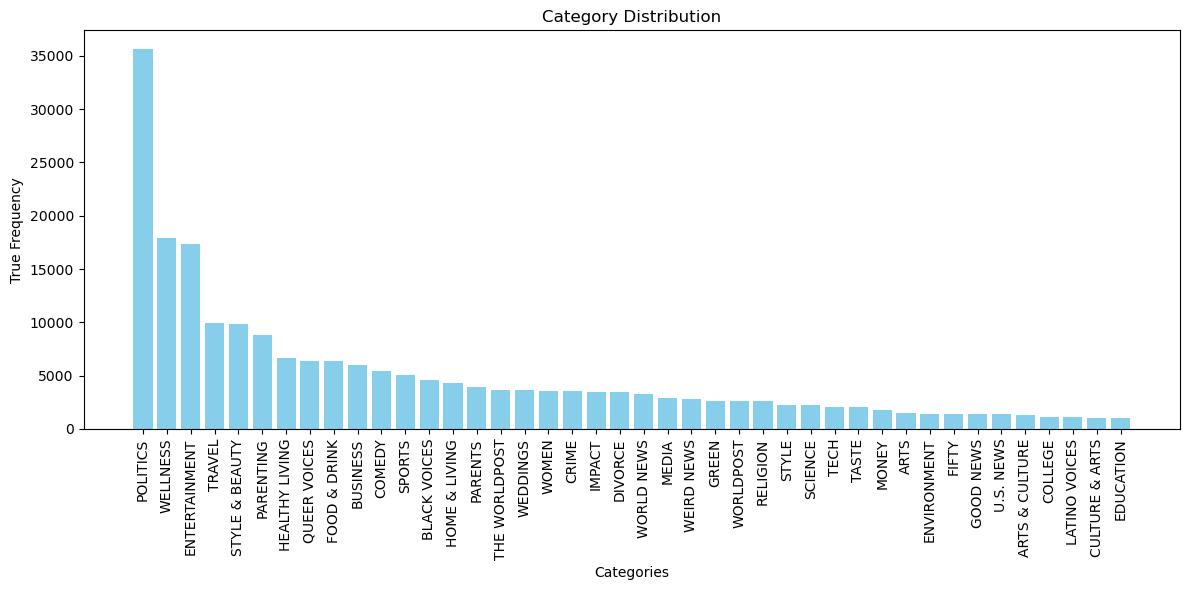

In [44]:
category_counts = data['news_category'].value_counts()
true_categories = category_counts.index
true_frequencies = category_counts.values

plt.figure(figsize=(12, 6))
plt.bar(true_categories, true_frequencies, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Categories')
plt.ylabel('True Frequency')
plt.title('Category Distribution')

plt.tight_layout()
plt.show()

2. Misra-Gries Approach and Performance Evaluation

(A) Implement Misra-Gries summary to find the most frequent categories. Please generate a plot of the estimated frequencies in descending order to observe the approximation skewness with a summary size of k = 20

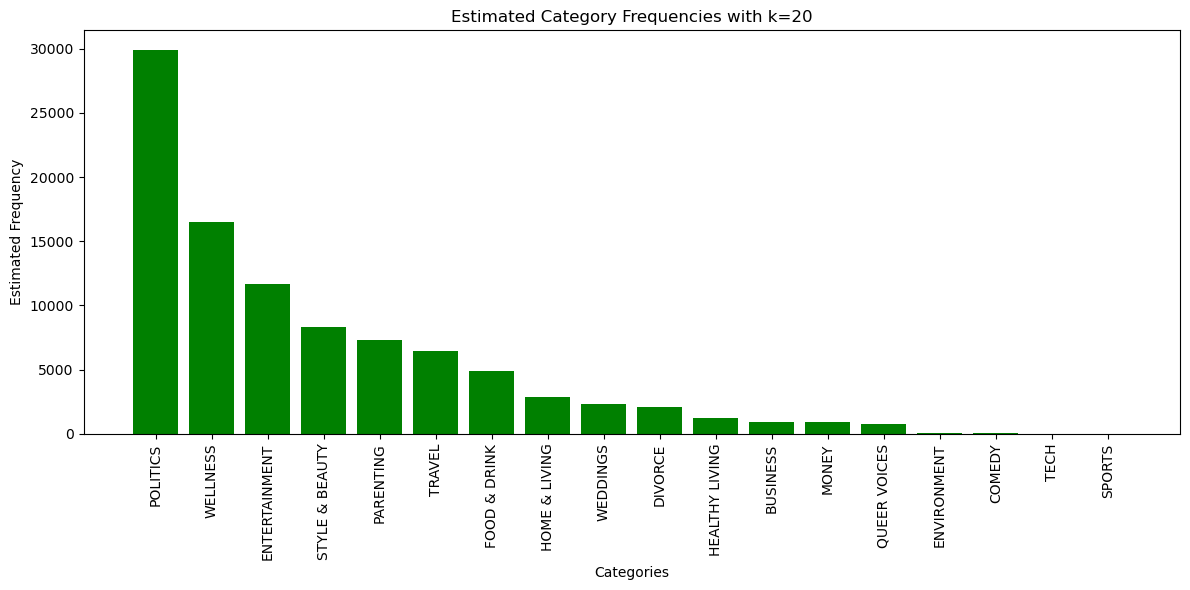

In [184]:
k = 20
misra_gries_summary = {}

for category in data['news_category']:
    if category in misra_gries_summary:
        misra_gries_summary[category] += 1
    elif len(misra_gries_summary) < k - 1:
        misra_gries_summary[category] = 1
    else:
        for key in list(misra_gries_summary.keys()):
            misra_gries_summary[key] -= 1
            if misra_gries_summary[key] == 0:
                del misra_gries_summary[key]
                
estimated_frequencies = sorted(misra_gries_summary.items(), key=lambda x: -x[1])
misra_categories, misra_counts = zip(*estimated_frequencies)

plt.figure(figsize=(12, 6))
plt.bar(misra_categories, misra_counts, color='green')
plt.xticks(rotation=90)
plt.xlabel('Categories')
plt.ylabel('Estimated Frequency')
plt.title('Estimated Category Frequencies with k=20')
plt.tight_layout()
plt.show()

(B)Compare the estimated frequency of all categories from the generated Misra-Gries summary with their
true frequencies from Q1(B). In particular, please provide a bar chart for all categories, displaying (1)
the estimated frequencies by the Misra-Gries approach in descending order (with k = 20), and (2) their
corresponding true frequencies. (Note: x-axis as categories, y-axis as frequency, and two distributions.)

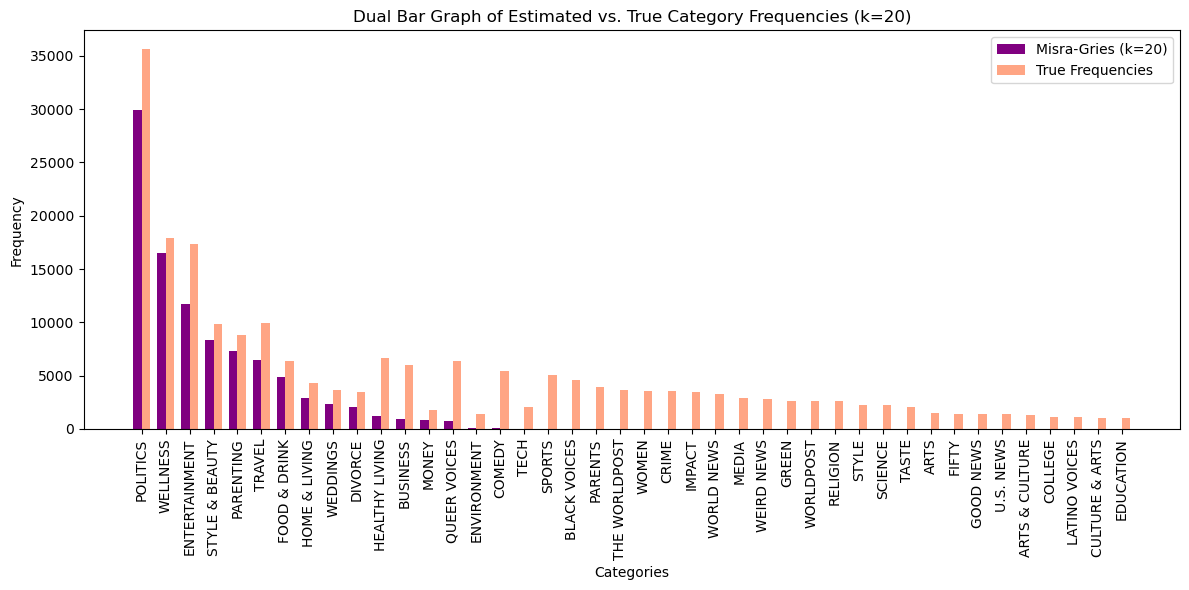

In [85]:
true_categories_list = true_categories.to_list()
misra_categories_list = list(misra_categories)

misra_values = []
true_values = []

for category in true_categories_list:
    true_values.append(true_frequencies[true_categories_list.index(category)])
    if category in misra_categories_list:
        misra_values.append(misra_counts[misra_categories_list.index(category)])
    else:
        misra_values.append(0)
        
sorted_data = sorted(zip(true_categories_list, true_values, misra_values), key=lambda x: x[2], reverse=True)
true_categories_list, true_values, misra_values = zip(*sorted_data)

plt.figure(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(true_categories))

plt.bar(index - bar_width/2, misra_values, bar_width, color='purple', label='Misra-Gries (k=20)')
plt.bar(index + bar_width/2, true_values, bar_width, color='coral', alpha=0.7, label='True Frequencies')

plt.xticks(index, true_categories_list, rotation=90)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Dual Bar Graph of Estimated vs. True Category Frequencies (k=20)')
plt.legend()
plt.tight_layout()
plt.show()

(C) Run your Misra-Gries summary and report the actual number of decrement steps calculated by your Misra-Gries with k = 20. 

In [94]:
k = 20
misra_gries_summary = {}
decrement_steps = 0

for category in data['news_category']:
    if category in misra_gries_summary:
        misra_gries_summary[category] += 1
    elif len(misra_gries_summary) < k - 1:
        misra_gries_summary[category] = 1
    else:
        for key in list(misra_gries_summary.keys()):
            misra_gries_summary[key] -= 1
            decrement_steps += 1 # Count decrement step
            if misra_gries_summary[key] == 0:
                del misra_gries_summary[key]
                
print("Number of decrement steps:")
print(decrement_steps)

Number of decrement steps:
107616


(D) Investigate the impact of the size of summary k ∈ {10, 20, 30, 40} on the average relative error across all categories by Misra-Gries Approach. Please provide curve plot across varying summary size k, with k as the x-axis and average absolute error of each news category (ci) as the y-axis.
<br><i> Absolute Error (ci) = ˜f(ci) − f(ci). </i> <br>
where ˜f(ci) is the estimated frequency and f(ci) is the true frequency of category ci.

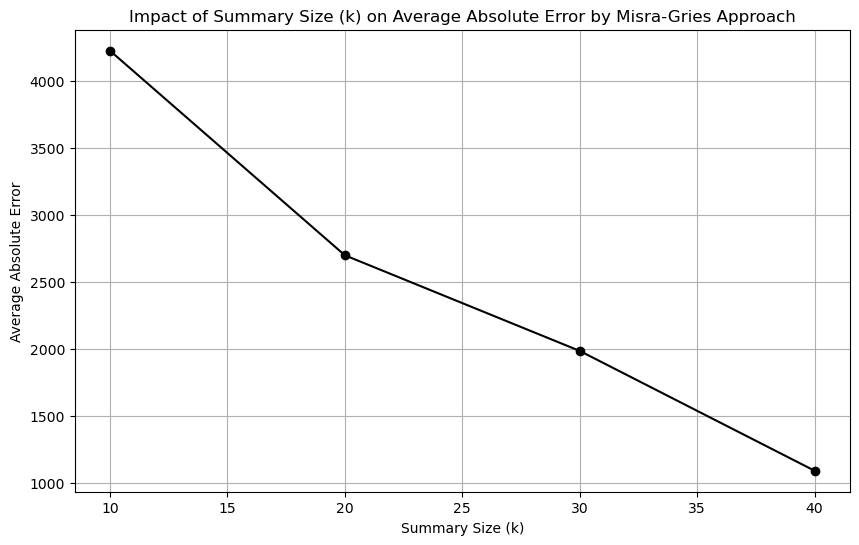

In [101]:
k_values = [10, 20, 30, 40]
average_absolute_errors = {}

#Iterate through K values
for k in k_values:
    misra_gries_summary = {}
    #Process Misra-Gries
    for category in data['news_category']:
        if category in misra_gries_summary:
            misra_gries_summary[category] += 1
        elif len(misra_gries_summary) < k - 1:
            misra_gries_summary[category] = 1
        else:
            for key in list(misra_gries_summary.keys()):
                misra_gries_summary[key] -= 1
                if misra_gries_summary[key] == 0:
                    del misra_gries_summary[key]
    #Estimated Frequencies
    estimated_frequencies = misra_gries_summary
    #True Frequencies
    true_category_counts = data['news_category'].value_counts()
    #Absolute Error Calculation
    absolute_errors = {}
    for category, true_count in true_category_counts.items():
        estimated_count = estimated_frequencies.get(category, 0)
        absolute_error = abs(estimated_count - true_count)
        absolute_errors[category] = absolute_error
    sum_absolute_error = sum(list(absolute_errors.values()))
    average_absolute_error = sum_absolute_error / len(true_categories)
    average_absolute_errors[k] = average_absolute_error
    
plt.figure(figsize=(10, 6))
plt.plot(k_values, list(average_absolute_errors.values()), marker='o', linestyle='-', color='black')
plt.xlabel('Summary Size (k)')
plt.ylabel('Average Absolute Error')
plt.title('Impact of Summary Size (k) on Average Absolute Error by Misra-Gries Approach')
plt.grid(True)
plt.show()

(E) Investigate the impact of the size of summary k ∈ {10, 20, 30, 40} on the run-time by Misra-Gries Approach. Please provide curve plot across varying summary size k, with k as the x-axis and run-time as the y-axis and comment how you would specify the value of k to achieve more accurate estimations with lesser run-time.

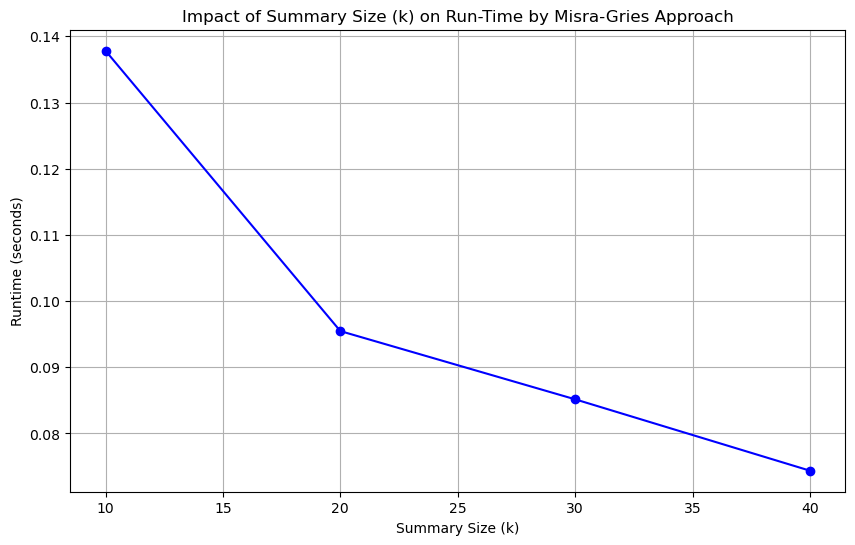

In [121]:
k_values = [10, 20, 30, 40]
runtimes = {}

for k in k_values:
    start_time = time.time()
    misra_gries_summary = {}
    
    #Process Misra-Gries
    for category in data['news_category']:
        if category in misra_gries_summary:
            misra_gries_summary[category] += 1
        elif len(misra_gries_summary) < k - 1:
            misra_gries_summary[category] = 1
        else:
            for key in list(misra_gries_summary.keys()):
                misra_gries_summary[key] -= 1
                if misra_gries_summary[key] == 0:
                    del misra_gries_summary[key]
                    
    #Calculate Run time
    end_time = time.time()
    runtime = end_time - start_time
    runtimes[k] = runtime

plt.figure(figsize=(10, 6))
plt.plot(k_values, list(runtimes.values()), marker='o', linestyle='-', color='b')
plt.xlabel('Summary Size (k)')
plt.ylabel('Runtime (seconds)')
plt.title('Impact of Summary Size (k) on Run-Time by Misra-Gries Approach')
plt.grid(True)
plt.show()

K is the size of the summary data structure used to estimate the frequencies of items in a data stream in Misra-Gries Approach.Increasing k can lead to more accurate estimations and less run time, but it also increases the memory usage.

3. Count Sketch Approach and Performance Evaluation

(A) Implement Count Sketch Algorithm to find the most frequent categories. Please report the plot of the estimated frequencies in descending order to observe the approximation skewness with a summary size of (w = 20, d = 4).

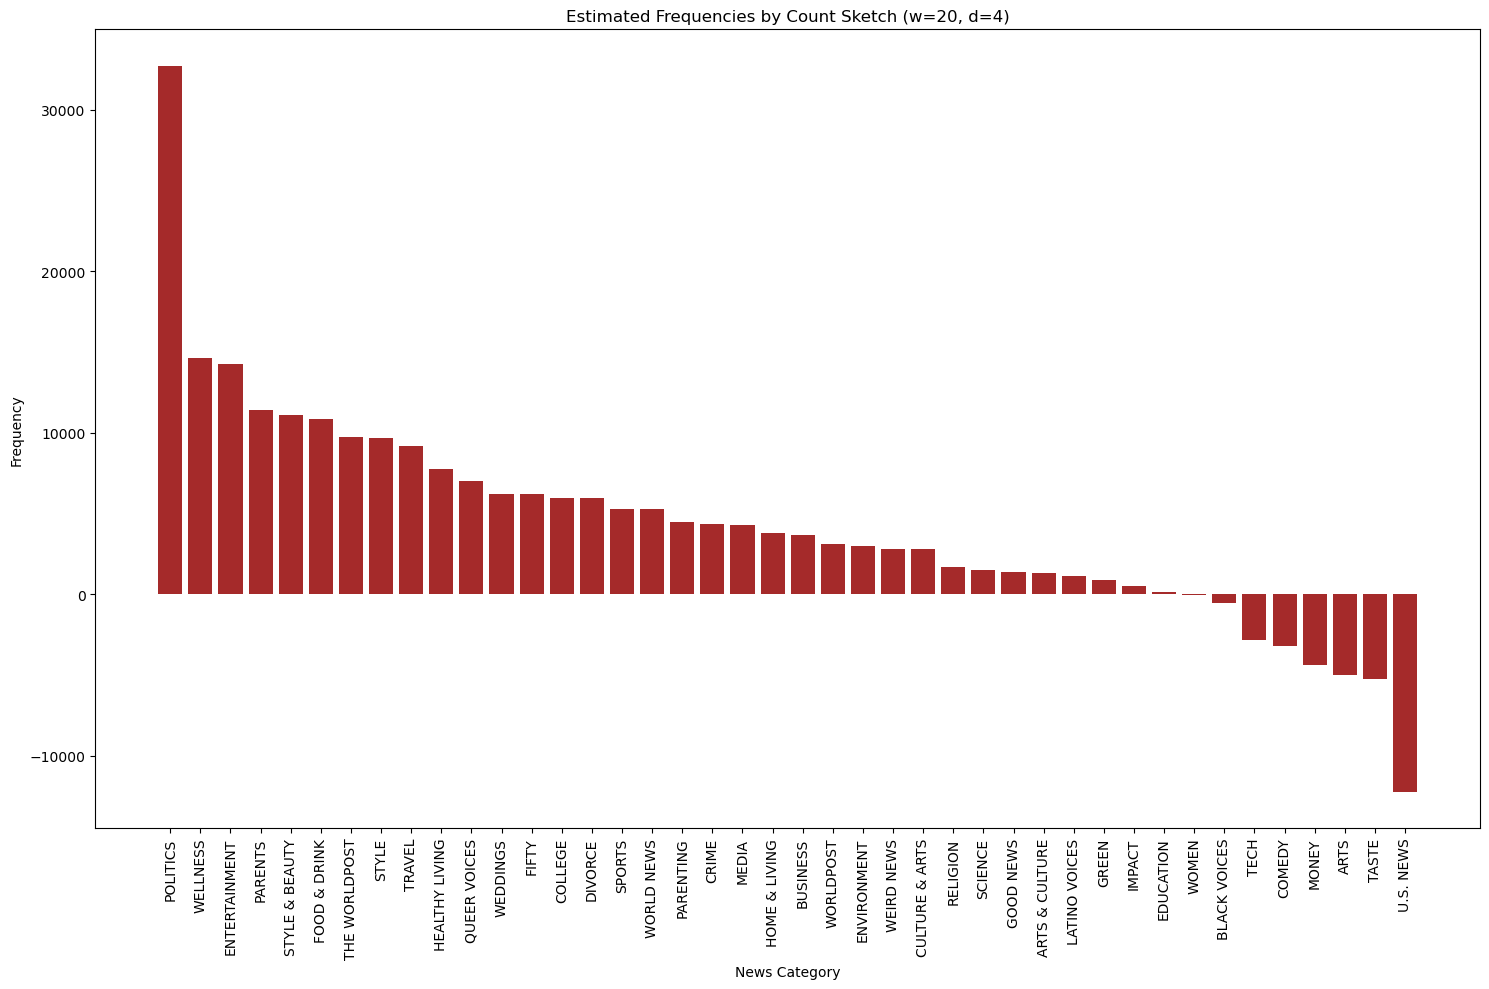

In [155]:
w, d = 20, 4
C = np.zeros((w, d), dtype=int)

def universal_hash(x, a, b, p, w):
    return ((a * x + b) % p) % w

np.random.seed(0)
a_values = np.random.randint(1, 100, size=d)
b_values = np.random.randint(1, 100, size=d)
p = 131071

for category in data['news_category']:
    for i in range(d):
        j = universal_hash(hash((category, i)), a_values[i], b_values[i], p, w)
        sign = (-1) ** (hash((category, i + d)) & 1)
        C[j][i] += sign

        
estimated_frequencies = {}
for category in data['news_category'].unique():
    estimates = [C[universal_hash(hash((category, i)), a_values[i], b_values[i], p, w)][i] * (-1) ** (hash((category, i + d)) & 1) for i in range(d)]
    estimated_frequencies[category] = np.median(estimates)

# Sort categories by estimated frequencies in descending order
cs_sorted = dict(sorted(estimated_frequencies.items(), key=lambda item: item[1], reverse=True))

# Plotting the estimated frequencies by Count Sketch
plt.figure(figsize=(15, 10))
plt.bar(cs_sorted.keys(), cs_sorted.values(), color='brown')
plt.title('Estimated Frequencies by Count Sketch (w=20, d=4)')
plt.xlabel('News Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

(B) Compare the estimated frequency of all categories with their true frequencies from Q1(B). In particular, please provide a curve plot for all categories, displaying (1) the estimated frequencies by the Count Sketch Algorithm in descending order with (w = 20, d = 4), and (2) their corresponding true frequencies. (Note: x-axis as categories, y-axis as frequency, and two distributions.)

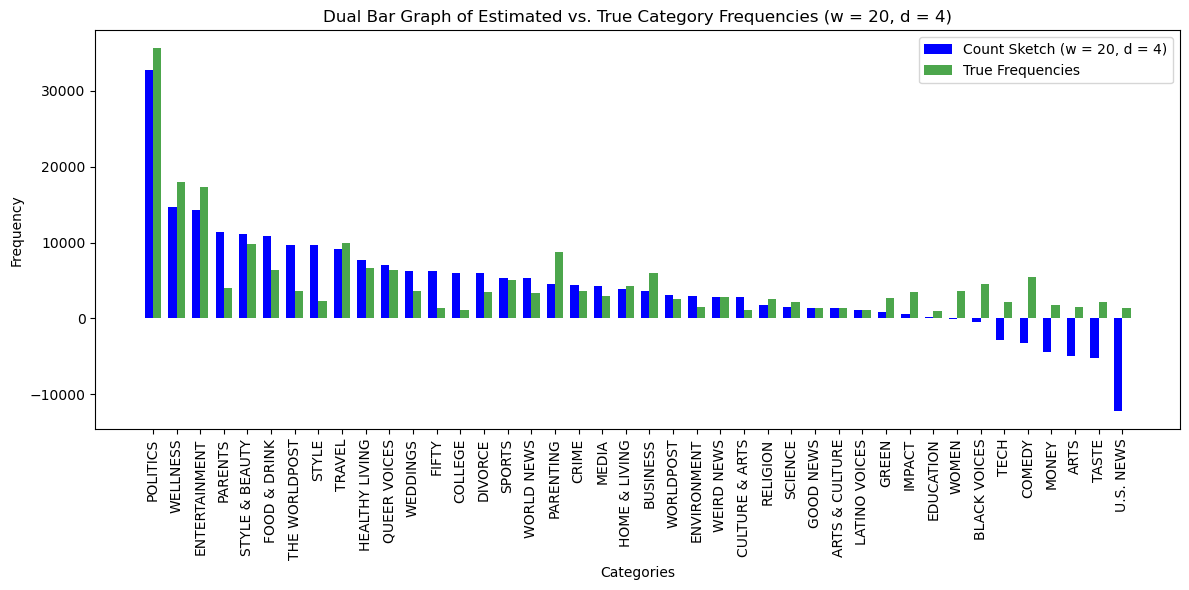

In [162]:
true_categories_list = true_categories.to_list()
csketch_categories_list = list(estimated_frequencies)


csketch_values = []
true_values = []

for category in true_categories_list:
    true_values.append(true_frequencies[true_categories_list.index(category)])
    if category in csketch_categories_list:
        csketch_values.append(estimated_frequencies[category]) 
    else:
        csketch_values.append(0)
        
sorted_data = sorted(zip(true_categories_list, true_values, csketch_values), key=lambda x: x[2], reverse=True)
true_categories_list, true_values, csketch_values = zip(*sorted_data)

plt.figure(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(true_categories))

plt.bar(index - bar_width/2, csketch_values, bar_width, color='blue', label='Count Sketch (w = 20, d = 4)')
plt.bar(index + bar_width/2, true_values, bar_width, color='green', alpha=0.7, label='True Frequencies')

plt.xticks(index, true_categories_list, rotation=90)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Dual Bar Graph of Estimated vs. True Category Frequencies (w = 20, d = 4)')
plt.legend()
plt.tight_layout()
plt.show()

(C) Investigate the impact of the bucket size w ∈ {10, 20, 30, 40} to the absolute error across all categories by
the Count Sketch Algorithm. Please provide curve plot across varying bucket size w, with w as the x-axis
and average absolute error of each news category (ci) as the y-axis (Eq.1). Please comment how you
would specify the value of w to achieve more accurate estimations.

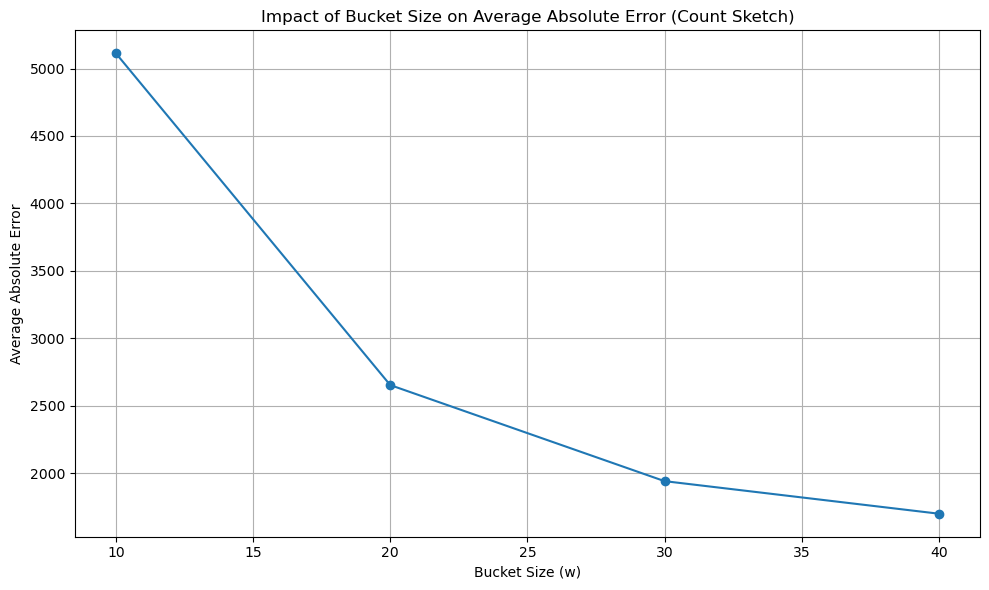

In [180]:
d = 4
p = 131071
a_values = np.random.randint(1, 100, size=d)
b_values = np.random.randint(1, 100, size=d)
w_values = [10, 20, 30, 40]


for w in w_values:
    C = np.zeros((w, d), dtype=int)
    
    for category in data['news_category']:
        for i in range(d):
            j = universal_hash(hash((category, i)), a_values[i], b_values[i], p, w)
            sign = (-1) ** (hash((category, i + d)) & 1)
            C[j][i] += sign

    
    estimated_frequencies = {}
    for category in data['news_category'].unique():
        estimates = [C[universal_hash(hash((category, i)), a_values[i], b_values[i], p, w)][i] * (-1) ** (hash((category, i + d)) & 1) for i in range(d)]
        estimated_frequencies[category] = np.median(estimates)
        
    absolute_errors = {}
    for category, true_count in true_category_counts.items():
        estimated_count = estimated_frequencies.get(category, 0)
        absolute_error = abs(estimated_count - true_count)
        absolute_errors[category] = absolute_error
    sum_absolute_error = sum(list(absolute_errors.values()))
    average_absolute_error = sum_absolute_error / len(true_categories)
    average_absolute_errors[w] = average_absolute_error

plt.figure(figsize=(10, 6))
plt.plot(w_values, list(average_absolute_errors.values()), marker='o', linestyle='-')
plt.xlabel('Bucket Size (w)')
plt.ylabel('Average Absolute Error')
plt.title('Impact of Bucket Size on Average Absolute Error (Count Sketch)')
plt.grid(True)
plt.tight_layout()
plt.show()


As the bucket size increases, we can see that there is decline in the Average Absolute error as larger bucket sizes allow for more precise estimation of frequencies.While larger bucket sizes can improve accuracy, they also increase the space complexity of the Count Sketch data structure.

(D) Investigate the impact of the number of hash functions d ∈ {2, 4, 8, 16} to the absolute error across all
categories by the Count Sketch Algorithm. Please provide curve plot across varying number of hash
functions d, with d as the x-axis and average absolute error of each news category (ci) as the y-axis
(Eq.1). Please comment how you would specify the value of d to achieve more accurate estimations

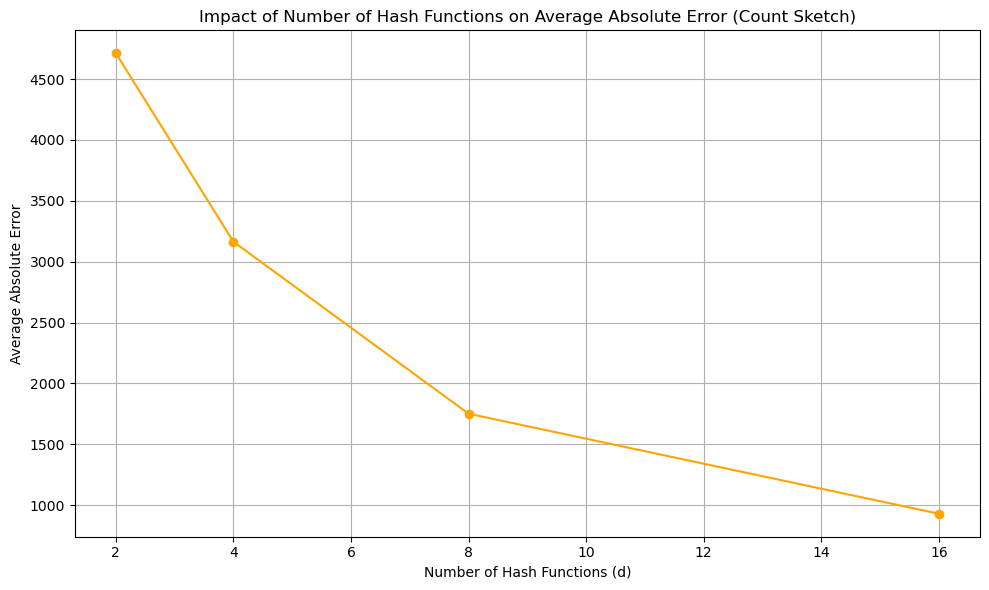

In [183]:
w = 20
p = 131071
d_values = [2, 4, 8, 16]
average_absolute_errors = {}

for d in d_values:
    a_values = np.random.randint(1, 100, size=d)
    b_values = np.random.randint(1, 100, size=d)
    C = np.zeros((w, d), dtype=int)
    
    for category in data['news_category']:
        for i in range(d):
            j = universal_hash(hash((category, i)), a_values[i], b_values[i], p, w)
            sign = (-1) ** (hash((category, i + d)) & 1)
            C[j][i] += sign

    estimated_frequencies = {}
    for category in data['news_category'].unique():
        estimates = [C[universal_hash(hash((category, i)), a_values[i], b_values[i], p, w)][i] * (-1) ** (hash((category, i + d)) & 1) for i in range(d)]
        estimated_frequencies[category] = np.median(estimates)
        
    absolute_errors = {}
    for category, true_count in true_category_counts.items():
        estimated_count = estimated_frequencies.get(category, 0)
        absolute_error = abs(estimated_count - true_count)
        absolute_errors[category] = absolute_error
    sum_absolute_error = sum(list(absolute_errors.values()))
    average_absolute_error = sum_absolute_error / len(true_categories)
    average_absolute_errors[d] = average_absolute_error

plt.figure(figsize=(10, 6))
plt.plot(d_values, list(average_absolute_errors.values()), marker='o', linestyle='-', color='orange')
plt.xlabel('Number of Hash Functions (d)')
plt.ylabel('Average Absolute Error')
plt.title('Impact of Number of Hash Functions on Average Absolute Error (Count Sketch)')
plt.grid(True)
plt.tight_layout()
plt.show()

<h3> Summary

This assignment focuses on exploring heavy hitters' algorithms using a real-world dataset. It is divided into three main parts, each of which involves implementing an algorithm and evaluating its performance.

<b>Brute Force Approach and Performance Evaluation</b> - In this part, you start by loading a real-world dataset containing news data. We calculated the average frequency of news categories in the dataset using a brute force approach.
and visualized the true category distribution with a bar chart.We primarily establish a baseline for comparison with other algorithms.

<b>Misra-Gries Approach and Performance Evaluation</b> - We implemented the Misra-Gries summary algorithm to find the most frequent categories in the dataset and generated a plot of estimated frequencies to observed the data to be right skewed with the help of bar chart. After comparing the estimated frequencies obtained from Misra-Gries with the true frequencies, we created a dual bar graph for visualization. It was clearly observed that some categories' frequencies were not calculated and there was difference in the true and estimated frequencies.We also found the actual number of decrement steps calculated during the Misra-Gries process. Finally, we investigated the impact of the summary size (k) on both average relative error and run-time. It was observed that as the K value increases the error value decreases.

<b>Count Sketch Approach and Performance Evaluation</b> - First we implemented the Count Sketch algorithm to find the most frequent categories in the dataset and generated a plot of estimated frequencies to observe the approximation skewness. We observed positive and negative frequencies as seen in the plot.Comparing the estimated frequencies obtained from Count Sketch with the true frequencies with create a dual bar graph we found that Misra-Gries Approach was better in terms of accuracy.
Then we investigated the impact of various parameters, such as bucket size (w) and the number of hash functions (d), on the average absolute error, which showed us that as the bucket size increases, we can see that there is decline in the Average Absolute error. Larger bucket sizes allow for more precise estimation of frequencies.While larger bucket sizes can improve accuracy, they also increase the space complexity of the Count Sketch data structure. Similar impact can be seen for the number of hash functions (d) on the performance of the Count Sketch algorithm.